In [25]:
import numpy as np
import time
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [68]:
is_vae = False

In [69]:
# Just choose the name of the dataset directory
DATA_DIR = '/Users/tomas/Documents/FEUP/Tese/data/ml-20m/processed_70_10_20'
if is_vae:
    PARSE_DATA_DIR = os.path.join(DATA_DIR, 'embeddings/vae')
else:
    PARSE_DATA_DIR = os.path.join(DATA_DIR, 'embeddings/cdae')

In [70]:
file = 'metadataset_k_20.csv'

In [71]:
#read in the data using pandas
metadataset = pd.read_csv(os.path.join(PARSE_DATA_DIR, file ))
metadataset.head()

,original_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,first_place
0,1,2.092112e-32,6.249415e-32,-6.000611e-33,5.893090e-32,4.020546e-32,2.152657e-32,-5.836300e-32,2.339763e-32,4.832709e-32,...,1.450966e-33,-2.433296e-32,-1.128275e-33,-1.185880e-33,1.241357e-32,-6.068290e-33,3.252277e-32,2.221478e-32,9.671203e-34,zeroes
1,2,-1.855838e-32,-2.090192e-32,-1.898156e-32,2.504322e-32,-2.451386e-32,-6.685095e-34,-3.221332e-32,-4.198181e-32,-6.362588e-32,...,1.600629e-32,3.991929e-32,-1.531876e-32,-4.649628e-32,-4.278011e-32,2.160474e-32,-3.867348e-32,2.380331e-32,-2.335757e-32,als_ndcg
2,3,-1.169303e-32,-6.049711e-32,4.136449e-32,-9.663286e-33,-1.924273e-32,3.455974e-32,1.667681e-32,5.966751e-34,-2.579415e-32,...,5.994075e-33,-1.462464e-32,-1.664031e-32,2.628347e-33,-1.029011e-32,1.240914e-32,-1.170141e-32,-2.649629e-32,2.516531e-32,most_popular_ndcg
3,4,-2.586232e-32,-3.247477e-32,6.048788e-33,1.627761e-32,5.529978e-32,-1.838027e-33,1.555958e-32,5.057206e-32,-2.870304e-33,...,1.395353e-32,-2.553700e-32,1.501834e-32,4.594490e-32,1.732268e-32,1.482250e-32,-7.583220e-33,4.964787e-32,1.042384e-32,zeroes
4,5,-1.429949e-32,-1.369787e-32,-2.009418e-32,4.561260e-32,1.526659e-32,-2.487647e-32,5.173627e-33,-3.500297e-32,4.993383e-32,...,6.116732e-33,-1.546610e-32,-1.768405e-32,1.836809e-32,2.371812e-32,-1.883063e-32,5.819227e-32,4.135692e-32,-4.840399e-32,most_popular_ndcg


In [72]:
print("als: ", 34215/129757 * 100,"bpr: ", 25925/129757 * 100,"most_popular_ndcg: ", 29088/129757 * 100,"lmf_ndcg: ", 19252/129757 * 100,"zeros: ", 21277/129757 * 100 )

als:  26.36851961743875 bpr:  19.979654276840556 most_popular_ndcg:  22.417287699314873 lmf_ndcg:  14.836964479758317 zeros:  16.397573926647503


In [73]:
normalize = True

In [74]:
if normalize:
  #---- SET INPUTS -----
  scaler = StandardScaler()
  #Compute the mean and std to be used for later scaling.
  scaler.fit(metadataset.drop(columns=['first_place','original_id']))
  # Perform standardization by centering and scaling
  inputs_transform = scaler.transform(metadataset.drop(columns=['first_place','original_id']))
  inputs = pd.DataFrame(inputs_transform)
  inputs.head()
else:
  inputs = metadataset.drop(columns=['first_place','original_id'])


In [75]:
target = metadataset['first_place'].values

In [76]:
# Subset first 20k data points to visualize
x_subset = inputs[0:50000]
y_subset = target[0:50000]
#als 0
y_subset = np.where(y_subset=='als_ndcg', 0, y_subset)
#bpr 1
y_subset = np.where(y_subset=='bpr_ndcg', 1, y_subset)
#lmf 2
y_subset = np.where(y_subset=='lmf_ndcg', 2, y_subset)
#most_popular 3
y_subset = np.where(y_subset=='most_popular_ndcg', 3, y_subset)
#zeroes 4
y_subset = np.where(y_subset=='zeroes', 4, y_subset)
print(np.unique(y_subset))

[0 1 2 3 4]


In [77]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.45884108543395996 seconds


In [78]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [9.99830129e-01 1.61050576e-04 1.54283806e-06 1.19581872e-06]


In [79]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.1927899487306539, -0.001614668812241951, '0'),
  Text(-0.1927899487306539, -0.001614668812241951, '1'),
  Text(-0.1927899487306539, -0.001614668812241951, '2'),
  Text(-0.1927899487306539, -0.001614668812241951, '3'),
  Text(-0.1927899487306539, -0.001614668812241951, '4')])

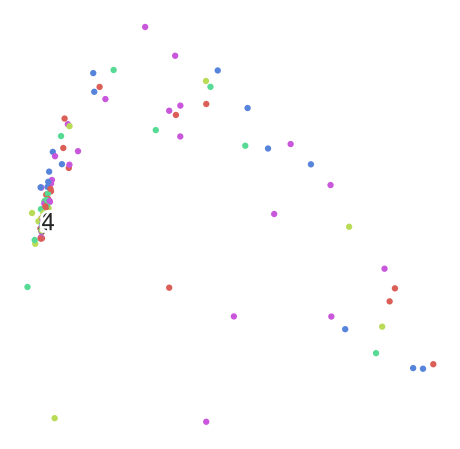

In [80]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [81]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

embeddings_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1537.961632013321 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-0.1007425, 0.006907768, '0'),
  Text(-0.11247459, 0.029150667, '1'),
  Text(-0.09378507, 0.026588308, '2'),
  Text(-0.09486589, 0.026210697, '3'),
  Text(-0.100374565, 0.009621238, '4')])

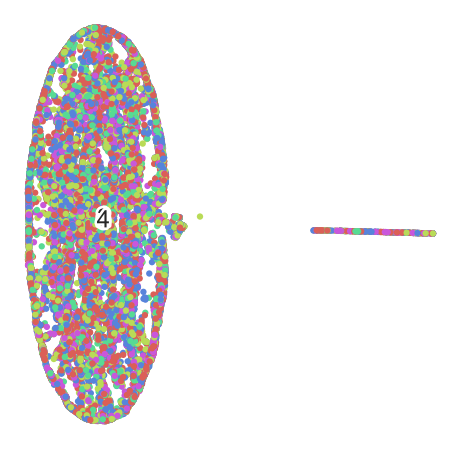

In [82]:
 fashion_scatter(embeddings_tsne, y_subset)

In [93]:
gridParams

{'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
 'num_leaves': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 'colsample_bytree': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 'reg_alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
 'reg_lambda': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
 'max_depth': array([ -1,  19,  39,  59,  79,  99, 119, 139, 159, 179, 199, 219, 239,
        259, 279, 299, 319, 339, 359, 379, 399])}